<a href="https://colab.research.google.com/github/ademaldemir/deeplearning/blob/master/chapter_3_multiclass_classification_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classification Problem

In this section, you’ll build a network to classify Reuters newswires into 46 mutually exclusive topics. Because you have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification. If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])                                                          

557056/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[0]

3

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)  

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 2.6224 - accuracy: 0.4850 - val_loss: 1.7341 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.4306 - accuracy: 0.7041 - val_loss: 1.3164 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0630 - accuracy: 0.7729 - val_loss: 1.1312 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8338 - accuracy: 0.8249 - val_loss: 1.0433 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6667 - accuracy: 0.8612 - val_loss: 0.9688 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5295 - accuracy: 0.8896 - val_loss: 0.9098 - val_accuracy: 0.8230
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4287 - accuracy: 0.9121 - val_loss: 0.9026 - val_accuracy: 0.8130
Epoch 8/20
16

In [23]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

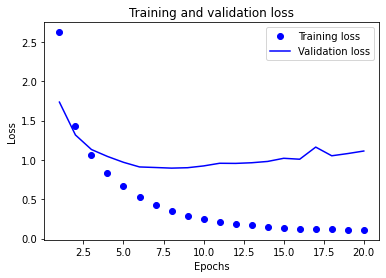

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

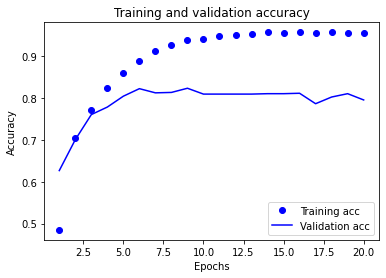

In [24]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.195013357079252

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [29]:
predictions[0]

array([3.73167353e-07, 3.83257825e-09, 4.75404383e-09, 9.90884721e-01,
       8.72703176e-03, 2.67592025e-11, 7.24074622e-09, 1.18041640e-07,
       3.32095697e-05, 7.81877230e-09, 5.29247721e-08, 2.95504316e-04,
       2.30408634e-08, 2.12668553e-07, 4.15239363e-08, 7.72088449e-10,
       4.33979767e-06, 1.38934708e-09, 2.32357209e-07, 3.56729688e-05,
       9.23813423e-06, 5.41682994e-07, 7.04907854e-10, 1.67101774e-07,
       1.61137734e-07, 5.59594060e-09, 9.73324976e-10, 2.69027245e-09,
       3.79103717e-08, 3.91980211e-06, 4.39215796e-07, 4.25493507e-09,
       9.26598958e-08, 4.00283834e-10, 5.10000916e-07, 1.10818910e-09,
       2.29712282e-06, 2.54116417e-09, 1.04224846e-07, 4.51022515e-07,
       9.76330217e-09, 4.64069842e-07, 1.64272174e-09, 4.46437359e-10,
       3.10021786e-10, 3.23926908e-09], dtype=float32)

In [30]:
np.sum(predictions[0])

1.0

In [37]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [32]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [36]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [38]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

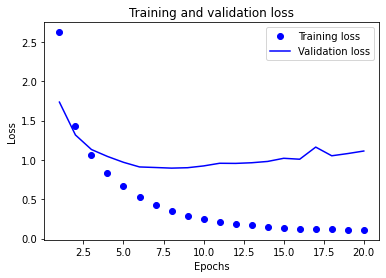

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

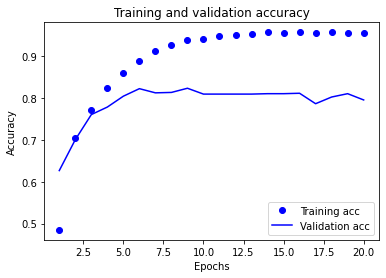

In [40]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 17ms/step - loss: 3.1976 - accuracy: 0.2427 - val_loss: 2.5614 - val_accuracy: 0.3940
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 2.1414 - accuracy: 0.4307 - val_loss: 1.9480 - val_accuracy: 0.4750
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.5742 - accuracy: 0.6503 - val_loss: 1.5469 - val_accuracy: 0.6530
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.2332 - accuracy: 0.6932 - val_loss: 1.4067 - val_accuracy: 0.6620
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0732 - accuracy: 0.7112 - val_loss: 1.3414 - val_accuracy: 0.6840
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9594 - accuracy: 0.7528 - val_loss: 1.3228 - val_accuracy: 0.6990
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.8686 - accuracy: 0.7766 - val_loss: 1.3435 - val_accuracy: 0.7070
Epoch 8/20
63

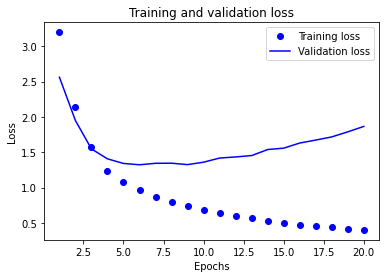

In [47]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

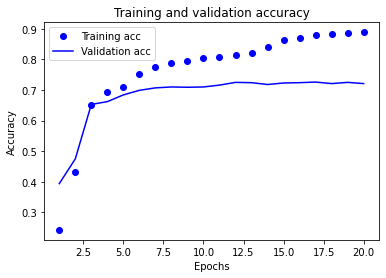

In [48]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()